# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [20]:
data = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [22]:
data["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [23]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

data["flight_day_mapped"] = data["flight_day"].map(mapping)

In [24]:
data["flight_day_mapped"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [25]:
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,flight_day_mapped
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560,3.814420
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643,1.992792
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000,1.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000,2.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000,4.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000,5.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000,7.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [26]:
data.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
flight_day_mapped        0
dtype: int64

In [27]:
mapping = {
    "Mon": 'Weekday',
    "Tue": 'Weekday',
    "Wed": 'Weekday',
    "Thu": 'Weekday',

    "Fri": 'Weekend',
    "Sat": 'Weekend',
    "Sun": 'Weekend',
}

data["flight_weekend"] = data["flight_day"].map(mapping)

In [28]:
data["flight_weekend"].unique()

array(['Weekend', 'Weekday'], dtype=object)

In [29]:
mapping = {
    "Weekday": '1',
    "Weekend": '2',
}

data["flight_weekend_mapped"] = data["flight_weekend"].map(mapping)

In [30]:
data["flight_weekend_mapped"].unique()

array(['2', '1'], dtype=object)

In [31]:
data["sales_channel"].unique()

array(['Internet', 'Mobile'], dtype=object)

In [32]:
mapping = {
    "Internet": 1,
    "Mobile": 2,
}

data["sales_channel_mapped"] = data["sales_channel"].map(mapping)

In [33]:
data["sales_channel_mapped"].unique()

array([1, 2], dtype=int64)

In [34]:
data["trip_type"].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [35]:
mapping = {
    "RoundTrip": 1,
    "CircleTrip": 2,
    "OneWay": 3,
}

data["trip_type_mapped"] = data["trip_type"].map(mapping)

In [36]:
data["trip_type_mapped"].unique()

array([1, 2, 3], dtype=int64)

In [37]:
data["booking_complete"].unique()

array([0, 1], dtype=int64)

In [38]:
mapping = {
    0: 'Booking Incomplete',
    1: 'Booking Complete',
}

data["booking_complete_unmapped"] = data["booking_complete"].map(mapping)

In [39]:
data["booking_complete_unmapped"].unique()

array(['Booking Incomplete', 'Booking Complete'], dtype=object)

In [40]:
data["booking_origin"].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

In [41]:
import pycountry_convert as pc

continent = []

data['booking_origin'] =  data['booking_origin'].replace('Myanmar (Burma)', 'Myanmar')

for i in range(len(data)):
    country = data['booking_origin'][i]
    try :
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        continent_name = pc.country_alpha2_to_continent_code(country_code)
        continent.append(continent_name)
    except:
        continent.append('Others')

data['booking_continent'] = continent

In [42]:
data["booking_continent"].unique()

array(['OC', 'AS', 'EU', 'AF', 'Others', 'NA', 'SA'], dtype=object)

In [43]:
mapping = {
    "NA": 1,
    "SA": 2,
    "EU": 3,
    "AF": 4,
    "AS": 5,
    "OC": 6,
    "Others": 7,
}

data["booking_continent_mapped"] = data["booking_continent"].map(mapping)

In [44]:
data["booking_continent_mapped"].unique()

array([6, 5, 3, 4, 7, 1, 2], dtype=int64)

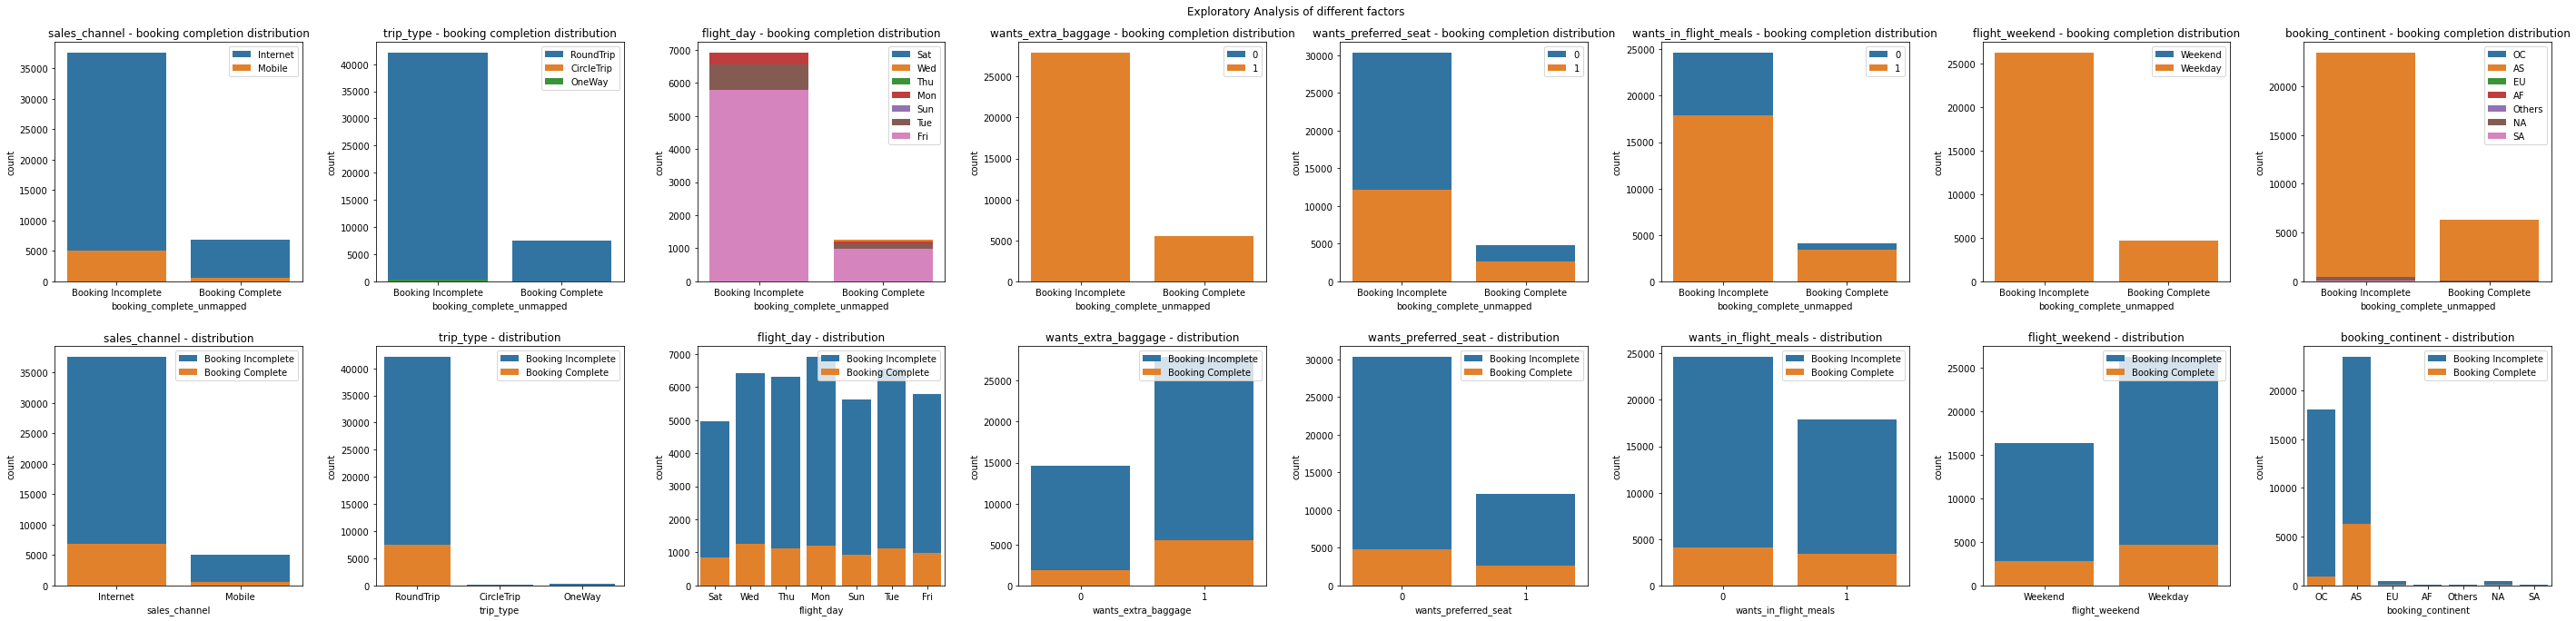

In [45]:
plotting_cols = ['sales_channel', 'trip_type', 'flight_day', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_weekend', 'booking_continent']
plotting_data = data[plotting_cols]

f, axes = plt.subplots(ncols=len(plotting_data.columns), figsize=(40,10),nrows=2)
f.tight_layout(pad=5.0)

for i in range(0,len(plotting_data.columns)):
    sns.countplot(hue=plotting_data.iloc[:,i],x=data['booking_complete_unmapped'], dodge=False, ax=axes[0,i])
    axes[0,i].set_title(plotting_data.columns[i] + ' - booking completion distribution')
    axes[0,i].legend(loc=1)
    sns.countplot(x=plotting_data.iloc[:,i],hue=data['booking_complete_unmapped'], dodge=False, ax=axes[1,i])
    axes[1,i].set_title(plotting_data.columns[i] + ' - distribution')
    axes[1,i].legend(loc=1)

f.suptitle('Exploratory Analysis of different factors')
plt.show()


# f, axes = plt.subplots(ncols=len(plotting_data.columns), figsize=(30,10),nrows=2)
# f.tight_layout(pad=5.0)

# for i in range(0,len(plotting_data.columns)):
#     sns.countplot(hue=plotting_data.iloc[:,i],x=data['booking_complete_unmapped'], dodge=True, ax=axes[0,i])
#     axes[0,i].set_title(plotting_data.columns[i] + ' - booking completion distribution')
#     axes[0,i].legend(loc=1)
#     sns.countplot(x=plotting_data.iloc[:,i],hue=data['booking_complete_unmapped'], dodge=True, ax=axes[1,i])
#     axes[1,i].set_title(plotting_data.columns[i] + ' - distribution')
#     axes[1,i].legend(loc=1)

# f.suptitle('Exploratory Analysis of different factors')   
# plt.show()

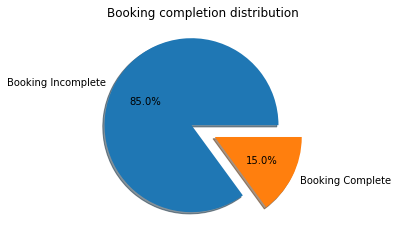

--------------------------------------------------


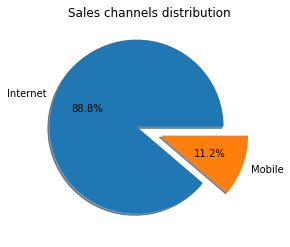

--------------------------------------------------


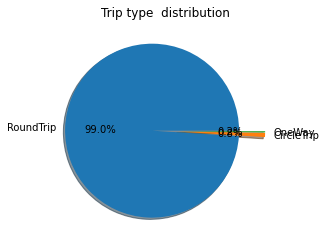

--------------------------------------------------


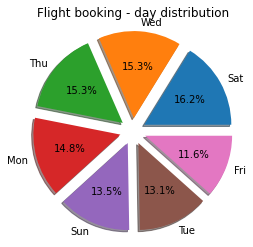

--------------------------------------------------


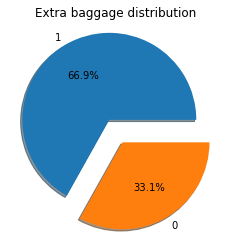

--------------------------------------------------


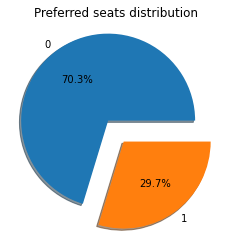

--------------------------------------------------


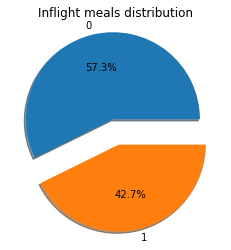

--------------------------------------------------


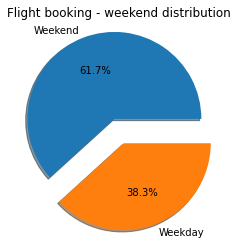

--------------------------------------------------


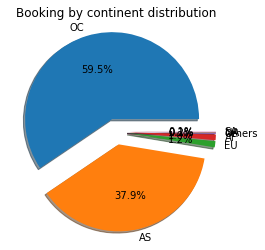

--------------------------------------------------


In [46]:
plt.pie(data["booking_complete_unmapped"].value_counts(), labels=data["booking_complete_unmapped"].unique(), 
        shadow=True, explode = (0.15, 0.15), autopct='%1.1f%%')
plt.title('Booking completion distribution')
plt.show()
print("--"*25)


plt.pie(data["sales_channel"].value_counts(), labels=data["sales_channel"].unique(), 
        shadow=True, explode = (0.15, 0.15), autopct='%1.1f%%')
plt.title('Sales channels distribution')
plt.show()
print("--"*25)


plt.pie(data["trip_type"].value_counts(), labels=data["trip_type"].unique(), 
        shadow=True, explode = (0.15, 0.15, 0.15), autopct='%1.1f%%')
plt.title('Trip type  distribution')
plt.show()
print("--"*25)


plt.pie(data["flight_day"].value_counts(), labels=data["flight_day"].unique(), 
        shadow=True, explode = (0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15), autopct='%1.1f%%')
plt.title('Flight booking - day distribution')
plt.show()
print("--"*25)


plt.pie(data["wants_extra_baggage"].value_counts(), labels=data["wants_extra_baggage"].unique(), 
        shadow=True, explode = (0.15, 0.15), autopct='%1.1f%%')
plt.title('Extra baggage distribution')
plt.show()
print("--"*25)


plt.pie(data["wants_preferred_seat"].value_counts(), labels=data["wants_preferred_seat"].unique(), 
        shadow=True, explode = (0.15, 0.15), autopct='%1.1f%%')
plt.title('Preferred seats distribution')
plt.show()
print("--"*25)


plt.pie(data["wants_in_flight_meals"].value_counts(), labels=data["wants_in_flight_meals"].unique(), 
        shadow=True, explode = (0.15, 0.15), autopct='%1.1f%%')
plt.title('Inflight meals distribution')
plt.show()
print("--"*25)


plt.pie(data["flight_weekend"].value_counts(), labels=data["flight_weekend"].unique(), 
        shadow=True, explode = (0.15, 0.15), autopct='%1.1f%%')
plt.title('Flight booking - weekend distribution')
plt.show()
print("--"*25)

plt.pie(data["booking_continent"].value_counts(), labels=data["booking_continent"].unique(), 
        shadow=True, explode = (0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15), autopct='%1.1f%%')
plt.title('Booking by continent distribution')
plt.show()
print("--"*25)

In [47]:
data['route_factorised'], _ = data['route'].factorize()
data['booking_origin_factorised'], _ = data['booking_origin'].factorize()
data['flight_duration_factorised'], _ = data['flight_duration'].factorize()

data['flight_weekend_mapped'] = pd.to_numeric(data['flight_weekend_mapped'])

In [48]:
modelling_cols=['num_passengers', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'route_factorised',
       'booking_origin_factorised', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration_factorised', 'booking_complete',
       'flight_day_mapped', 'sales_channel_mapped', 'trip_type_mapped', 'flight_weekend_mapped', 'booking_continent_mapped']

modelling_data = data[modelling_cols]
# modelling_data.dtypes
modelling_data

,num_passengers,purchase_lead,length_of_stay,flight_hour,route_factorised,booking_origin_factorised,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration_factorised,booking_complete,flight_day_mapped,sales_channel_mapped,trip_type_mapped,flight_weekend_mapped,booking_continent_mapped
0,2,262,19,7,0,0,1,0,0,0,0,6,1,1,2,6
1,1,112,20,3,0,0,0,0,0,0,0,6,1,1,2,6
2,2,243,22,17,0,1,1,1,0,0,0,3,1,1,1,5
3,1,96,31,4,0,0,0,0,1,0,0,6,1,1,2,6
4,2,68,22,15,0,1,1,0,1,0,0,3,1,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,638,36,1,0,1,11,0,6,1,1,2,6
49996,1,111,6,4,638,36,0,0,0,11,0,7,1,1,2,6
49997,1,24,6,22,638,36,0,0,1,11,0,6,1,1,2,6
49998,1,15,6,11,638,36,1,0,1,11,0,1,1,1,1,6


In [49]:
x = modelling_data.drop('booking_complete', axis=1)
y = modelling_data['booking_complete']

In [50]:
from sklearn.model_selection import train_test_split

x_train_and_val, x_test, y_train_and_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train_and_val, y_train_and_val, test_size=0.3, random_state=42)


In [101]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(x, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=x.columns).sort_values(ascending=True)

# mi_scores = mi_scores.sort_values(ascending=False)

mi_scores # show a few features with their MI scores

flight_day_mapped            0.00
flight_hour                  0.00
purchase_lead                0.00
wants_in_flight_meals        0.00
num_passengers               0.00
flight_weekend_mapped        0.00
wants_preferred_seat         0.00
wants_extra_baggage          0.00
trip_type_mapped             0.01
sales_channel_mapped         0.01
length_of_stay               0.01
flight_duration_factorised   0.02
booking_continent_mapped     0.03
booking_origin_factorised    0.05
route_factorised             0.05
Name: MI Scores, dtype: float64

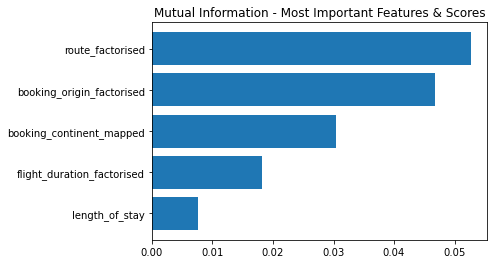

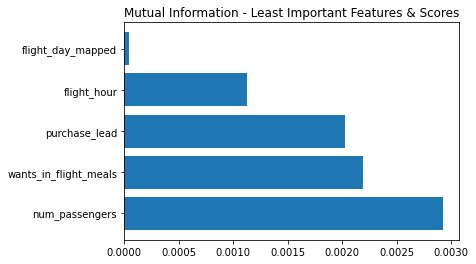

In [103]:
mi_scores_plot1 = mi_scores.tail(5)

plt.figure(figsize=(6, 4))
plt.barh(width=mi_scores_plot1, y=mi_scores_plot1.index)
plt.yticks(mi_scores_plot1.index, mi_scores_plot1.index, rotation=0)    
plt.title("Mutual Information - Most Important Features & Scores")
plt.show()


mi_scores_plot2 = mi_scores.head(5).sort_values(ascending=False)
plt.figure(figsize=(6, 4))
plt.barh(width=mi_scores_plot2, y=mi_scores_plot2.index)
plt.yticks(mi_scores_plot2.index, mi_scores_plot2.index, rotation=0)    
plt.title("Mutual Information - Least Important Features & Scores")
plt.show()

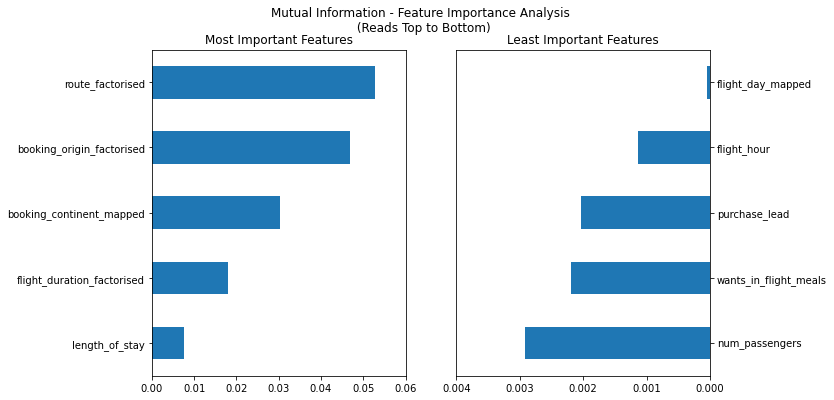

In [138]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
# title='(Random Forest) Classifier - Most Important Features & Scores', figsize=(6, 4),
mi_scores1 = mi_scores.sort_values(ascending=True).tail(5).plot(kind='barh',title='Most Important Features', ax=axes[0])
mi_scores2 = mi_scores.sort_values(ascending=True).head(5).sort_values(ascending=False).plot(kind='barh', title='Least Important Features', ax=axes[1])
# title='(Random Forest) Classifier - Least Important Features & Scores',figsize=(6, 4),
axes[1].yaxis.tick_right()
axes[1].yaxis.set_label_position("right")
# axes[1].invert_yaxis()  # labels read top-to-bottom
axes[1].invert_xaxis()  # labels read top-to-bottom
axes[1].set_xticks(np.arange(0.000,0.0041,0.001)) 
axes[0].set_xticks(np.arange(0.000,0.061,0.01)) 

fig.suptitle('Mutual Information - Feature Importance Analysis \n (Reads Top to Bottom)')
# fig.suptitle('(Random Forest) Classifier - Most (Left) and Least (Right) Important Features & Scores')

plt.show()


In [53]:
from lazypredict.Supervised import LazyClassifier 
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

clf_model, clf_prediction = clf.fit(x_train, x_val, y_train, y_val)
print(clf_model)
print("---------")
# print(clf_prediction)


 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [06:06<00:19, 19.85s/it]

[LightGBM] [Info] Number of positive: 4194, number of negative: 23806
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 914
[LightGBM] [Info] Number of data points in the train set: 28000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.149786 -> initscore=-1.736283
[LightGBM] [Info] Start training from score -1.736283


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [06:07<00:00, 12.68s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.58               0.64     0.64      0.64   
DecisionTreeClassifier             0.77               0.58     0.58      0.78   
GaussianNB                         0.79               0.57     0.57      0.79   
ExtraTreeClassifier                0.78               0.56     0.56      0.78   
LabelSpreading                     0.78               0.56     0.56      0.78   
LabelPropagation                   0.78               0.56     0.56      0.78   
BaggingClassifier                  0.84               0.55     0.55      0.80   
QuadraticDiscriminantAnalysis      0.80               0.55     0.55      0.79   
XGBClassifier                      0.84               0.55     0.55      0.81   
RandomForestClassifier             0.85               0.54     0.54      0.80   
ExtraTreesClassifier        

In [54]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC



In [55]:
from sklearn.metrics import classification_report, accuracy_score
import time
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def confusionmatrix(predictions):
    cm = confusion_matrix(y_val, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    return disp.plot()

def eval_classification(model):
    y_pred = model.predict(x_val)
#     y_pred_train = model.predict(x_over)
  
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_val, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_val, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_val, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_val, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_val, y_pred))
#     print("roc_auc (train-proba): %.2f" % roc_auc_score(y_over, y_pred_train))



classifiers = {"RandomForestClassifier": RandomForestClassifier(), "AdaBoostClassifier":AdaBoostClassifier(),"LogisticRegression": LogisticRegression(),
              "ExtraTreesClassifier":ExtraTreesClassifier(), "DecisionTreeClassifier":DecisionTreeClassifier(),
               "KNeighborsClassifier":KNeighborsClassifier(),"SVC":SVC(), "XGBClassifier":XGBClassifier()}

for key, classifier in classifiers.items():
    x_train, x_val, y_train, y_val = train_test_split(x_train_and_val, y_train_and_val, test_size=0.3, random_state=42)

    start_time = time.time()
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_val)
    end_time = time.time()

#     x_val['booking_complete'] = y_pred
    checking_df = pd.DataFrame(y_val)
    checking_df['Prediction'] = y_pred
    non_match_count = len(checking_df.loc[checking_df.booking_complete != checking_df.Prediction])
    
    print(key)
    print("")
#     confusionmatrix(y_pred)
    eval_classification(classifier)

    print("The number of predictions that do not match the expectation is:", non_match_count)
    print("---"*30)

#     print("{0} took {1} s and here is the classification report: \n {2}".format(key,round(end_time - start_time,2), classification_report(y_val, y_pred)))
#     print("---"*30)

    print("{0} took {1} s; its accuracy score is {2} and F1-score is {3}".format(key,round(end_time - start_time,2), round(metrics.accuracy_score(y_val,y_pred),2),round(metrics.f1_score(y_val,y_pred),2)))
    print("---"*30)
    
    
#     print("")
#     print("")
    print("")



RandomForestClassifier

Accuracy (Test Set): 0.85
Precision (Test Set): 0.51
Recall (Test Set): 0.10
F1-Score (Test Set): 0.16
roc_auc (test-proba): 0.54
The number of predictions that do not match the expectation is: 1800
------------------------------------------------------------------------------------------
RandomForestClassifier took 5.29 s; its accuracy score is 0.85 and F1-score is 0.16
------------------------------------------------------------------------------------------

AdaBoostClassifier

Accuracy (Test Set): 0.85
Precision (Test Set): 0.48
Recall (Test Set): 0.04
F1-Score (Test Set): 0.07
roc_auc (test-proba): 0.51
The number of predictions that do not match the expectation is: 1809
------------------------------------------------------------------------------------------
AdaBoostClassifier took 1.59 s; its accuracy score is 0.85 and F1-score is 0.07
------------------------------------------------------------------------------------------

LogisticRegression

Accuracy

Accuracy (Test Set): 0.84
Precision (Test Set): 0.44
Recall (Test Set): 0.12
F1-Score (Test Set): 0.19
roc_auc (test-proba): 0.55


<AxesSubplot:title={'center':'XGB Classifier - Top 5 Most Important Features & Scores'}>

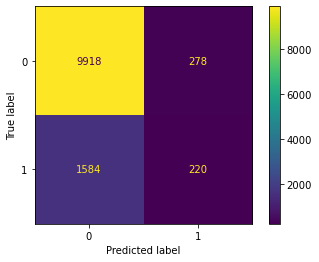

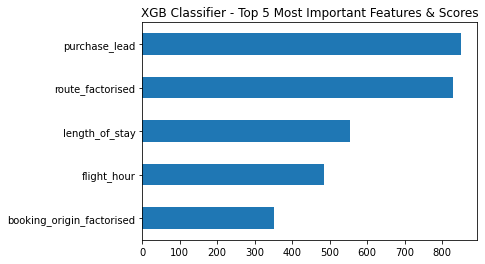

In [88]:
clf=XGBClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_val)

confusionmatrix(y_pred)
eval_classification(clf) 


feature_important = clf.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=True)
data.nlargest(40, columns="score").sort_values(by = "score", ascending=True).tail(5).plot(kind='barh', title='XGB Classifier - Most Important Features & Scores', figsize=(6, 4), legend=None) ## plot top 40 features

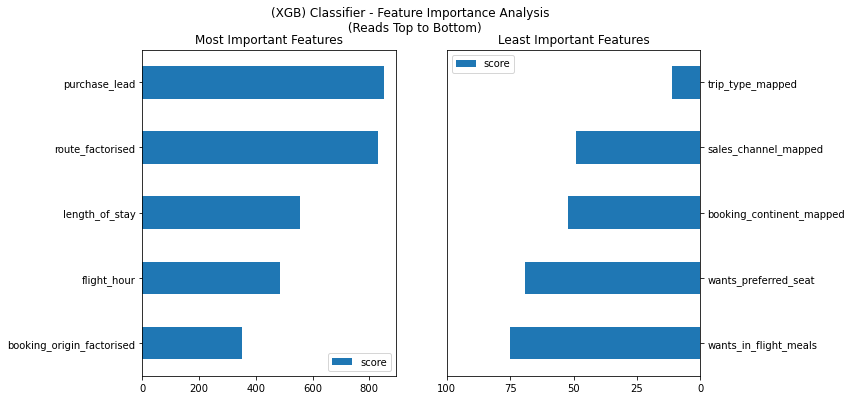

In [150]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
# title='(Random Forest) Classifier - Most Important Features & Scores', figsize=(6, 4),
xgb1 = data.sort_values(by = "score",ascending=True).tail(5).plot(kind='barh',title='Most Important Features', ax=axes[0])
xgb2 = data.sort_values(by = "score",ascending=True).head(5).sort_values(by = "score",ascending=False).plot(kind='barh', title='Least Important Features', ax=axes[1])
# title='(Random Forest) Classifier - Least Important Features & Scores',figsize=(6, 4),
axes[1].yaxis.tick_right()
axes[1].yaxis.set_label_position("right")
# axes[1].invert_yaxis()  # labels read top-to-bottom
axes[1].invert_xaxis()  # labels read top-to-bottom
axes[0].set_xticks(np.arange(0.0000,1000,200)) 
axes[1].set_xticks(np.arange(0.0000,110,25)) 


fig.suptitle('(XGB) Classifier - Feature Importance Analysis \n (Reads Top to Bottom)')
# fig.suptitle('(Random Forest) Classifier - Most (Left) and Least (Right) Important Features & Scores')

plt.show()


0.84925


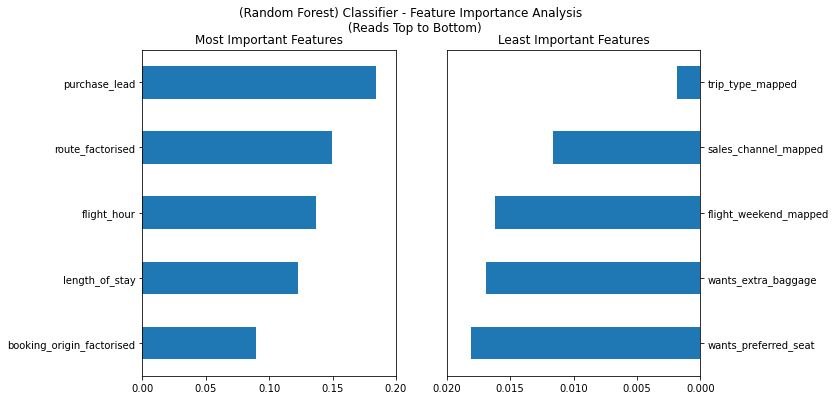

Accuracy (Test Set): 0.85
Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
roc_auc (test-proba): 0.50


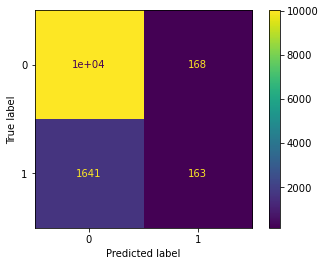

In [127]:
x_train, x_val, y_train, y_val = train_test_split(x_train_and_val, y_train_and_val, test_size=0.3, random_state=42)


model = RandomForestClassifier().fit(x_train, y_train)
y_pred=model.predict(x_val)

print(model.score(x_val, y_val))

importances = model.feature_importances_
feature_names = x_train.columns

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
# title='(Random Forest) Classifier - Most Important Features & Scores', figsize=(6, 4),
forest_importances1 = pd.Series(importances, index=feature_names).sort_values(ascending=True).tail(5).plot(kind='barh',title='Most Important Features', ax=axes[0])
forest_importances2 = pd.Series(importances, index=feature_names).sort_values(ascending=True).head(5).sort_values(ascending=False).plot(kind='barh', title='Least Important Features', ax=axes[1])
# title='(Random Forest) Classifier - Least Important Features & Scores',figsize=(6, 4),
axes[1].yaxis.tick_right()
axes[1].yaxis.set_label_position("right")
# axes[1].invert_yaxis()  # labels read top-to-bottom
axes[1].invert_xaxis()  # labels read top-to-bottom
axes[1].set_xticks(np.arange(0.0000,0.02250,0.0050)) 
axes[0].set_xticks(np.arange(0.000,0.225,0.050)) 


fig.suptitle('(Random Forest) Classifier - Feature Importance Analysis \n (Reads Top to Bottom)')
# fig.suptitle('(Random Forest) Classifier - Most (Left) and Least (Right) Important Features & Scores')

plt.show()

confusionmatrix(y_pred)
eval_classification(clf)


0.8496666666666667
Accuracy (Test Set): 0.85
Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
roc_auc (test-proba): 0.50


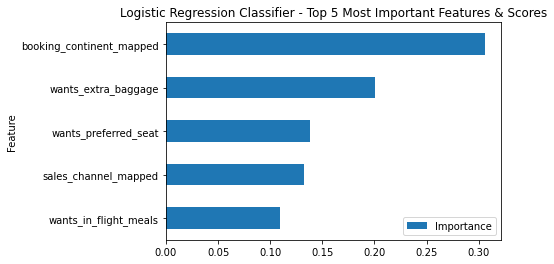

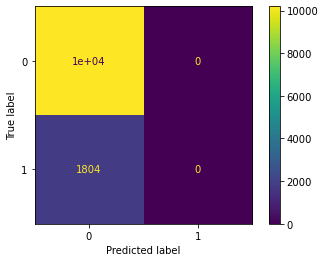

In [90]:
x_train, x_val, y_train, y_val = train_test_split(x_train_and_val, y_train_and_val, test_size=0.3, random_state=42)

clf = LogisticRegression().fit(x_train, y_train)
print(clf.score(x_val, y_val))
y_pred=clf.predict(x_val)

coefficients = clf.coef_[0]

feature_importance = pd.DataFrame({'Feature': x_train.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True).tail(5).plot(title='Logistic Regression Classifier - Most Important Features & Scores', x='Feature', y='Importance', kind='barh', figsize=(6, 4))

confusionmatrix(y_pred)
eval_classification(clf)

